# Linear Regression the PyTorch Way

## PyTorch Rhythm
1. Design your Model using class with Variables.
2. Construct Loss and Optimizer (Select from PyTorch API).
3. Training Cycle (Forward, Backward, Update)

We will try to turn the Model:
$$\hat{y}=w*x + b$$
Into a ready to train PyTorch Implementation, let's do it:

In [145]:
import torch
from torch import nn
from torch.nn import Module
from torch.autograd import Variable
import numpy as np

### Data Definition

In [132]:
X = Variable(Tensor([[.1], [.2], [.3]]))
y = Variable(Tensor([[.2], [.4], [.6]]))

In [133]:
X.shape, y.shape

(torch.Size([3, 1]), torch.Size([3, 1]))

### Model Class Definition
A neural network in PyTorch is a class definition that inherits from `nn.Module`.

We'll implement it for our Linear regression model:

In [134]:
class LinearModel(torch.nn.Module):
    '''
    In the Constructor we instantiate two nn.Linear Modules
    One in and One out.
    '''
    
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(in_features=1, out_features=1)
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        '''
        In the forward function we accept a variable of Input Data.
        And we must return a variable of output data.
        We can use modules defined in the constructor as ..
        .. Arbitrary operators on Variables.
        '''
        y_hat = self.relu(self.linear(x))
        return y_hat

`__init__` serves as a step for initialization and defining some elements and methods that will be used class-wise, the logic follow general OOP Programming.

Then we use our neural network like this:

In [135]:
del(model)
model = LinearModel()

### Loss & Optimizer Definition
We'll use predefined methods in PyTorch to declare the Loss and optimizer functions and add them to our model:

In [136]:
criterion = torch.nn.MSELoss(size_average=False)

The Call to `model.parameters()` in the SGD constructor will contain the learnable weights of the Model, we pass the parameters that we want to be updated.

In [137]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### 3. Training: Forward, Loss, Backward, Step Update

Now we'll create the Training loop:

In [138]:
for epoch in range(10000):
    # Forward Pass: Compute the predictions.
    y_pred = model(X)
    
    # Forward Pass: Calculate the Loss.
    loss = criterion(y_pred, y)
    
    if epoch % 500 == 0: 
        print(epoch, loss.data[0], ' | Y_hat: ', 
              str(y_pred.data.numpy().reshape((3,))), 
              ' / Y: ', str(y.data.numpy().reshape((3,))),
             ' / Weights: ', str([w.data.numpy().reshape((1,))[0] for w in model.parameters()])
             )
    
    # zero out the gradients.
    optimizer.zero_grad()
    
    # perform a backward pass.
    loss.backward()
    
    # we update the weights, and the weights live in the optimizer.
    optimizer.step()

0 0.14909563958644867  | Y_hat:  [0.44804713 0.37653    0.30501288]  / Y:  [0.2 0.4 0.6]  / Weights:  [-0.71517134, 0.5195643]
500 0.1000080555677414  | Y_hat:  [0.4264722  0.4028843  0.37929642]  / Y:  [0.2 0.4 0.6]  / Weights:  [-0.23587887, 0.45006007]
1000 0.0680781826376915  | Y_hat:  [0.38685352 0.4023797  0.41790587]  / Y:  [0.2 0.4 0.6]  / Weights:  [0.15526173, 0.37132734]
1500 0.04634266346693039  | Y_hat:  [0.35416576 0.40196344 0.44976112]  / Y:  [0.2 0.4 0.6]  / Weights:  [0.4779768, 0.30636808]
2000 0.03154672309756279  | Y_hat:  [0.3271963  0.40161994 0.47604358]  / Y:  [0.2 0.4 0.6]  / Weights:  [0.7442365, 0.25277263]
2500 0.021474670618772507  | Y_hat:  [0.30494475 0.40133658 0.4977284 ]  / Y:  [0.2 0.4 0.6]  / Weights:  [0.96391815, 0.20855294]
3000 0.014618408866226673  | Y_hat:  [0.286586   0.40110278 0.5156196 ]  / Y:  [0.2 0.4 0.6]  / Weights:  [1.145168, 0.17206918]
3500 0.00995112769305706  | Y_hat:  [0.2714387  0.4009098  0.53038096]  / Y:  [0.2 0.4 0.6]  / We

Even though the parameters are good, the activation ReLU function does screw up our stuff when we insert negative values, it doesn't have any adjustable parameters, one way to look at this is don't use the ReLU activation function on the last layer when you sometimes expect negative values as predictions. Example of this next:

In [139]:
X_n = Variable(Tensor([[-0.1]]))

In [140]:
model(X_n)

Variable containing:
 0
[torch.FloatTensor of size 1x1]

Previously, we looped over the points one by one (which is feasable), and updated the weight, but when you have a lot of rows (in the millions for example), it's not efficient, that's why we use Stochastic Gradient Descent, when using SGD we are calculating the loss over a batch of data and not a single point. So it will be much faster that way.

When we try to test/get prediction of new points, we just call the `forward` method on the model instance:

In [141]:
# After training.
new_x = Variable(Tensor([[41.]]))

In [143]:
# Let's predict.
print('X = 41., Y = ', model.forward(new_x).data[0][0])

X = 41., Y =  79.6376724243164


### Exos :
<img src="Other_optimizers.png" />

---

## Note
Before diving in, Let's check if we can visualize pytorch graphs (because torch tracks the graph so it can calcualte the gradients), I've installed a library to do this, let's check it out:

In [31]:
from torch import nn
from torch.autograd import Variable
from torch import Tensor
from torchviz import make_dot, make_dot_from_trace

In [24]:
del(m)
m = nn.Sequential()

In [25]:
# we add some layers.
m.add_module('W0', nn.Linear(in_features=8, out_features=16))

In [26]:
m.add_module('tanh', nn.Tanh())

In [27]:
#m.add_module('W1', nn.Linear(in_features=16, out_features=1))

We Declare the Model:

In [28]:
x = Variable(torch.randn(1, 8))
y = m(x)

Now we plot the Graph:

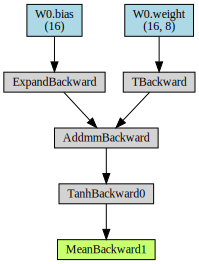

In [29]:
make_dot(y.mean(), params=dict(m.named_parameters()))

Not very intuitive, this might help in debugging but it's not very good at providing a high level overview of the neural architecture, i'll ignore it until i need it, and by the way, keras doesn't support pytorch so you have to use a high level lib for pytorch if you want to quickly prototype NNs. 

Let's go back to the course.

---